In [106]:
# 1. Install quantmod if needed
# install.packages('quantmod')

In [134]:
# 2. Load quantmod library
library(quantmod)

In [135]:
# 3. Get price data for security
tsla = getSymbols('TSLA', src='google', from= '2016-07-20', auto.assign=FALSE)

In [136]:
# 4. Take a look at the first few rows of downloaded data
head(tsla)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume
2016-07-20    226.47    229.80   225.00     228.36     2568498
2016-07-21    226.00    227.85   219.10     220.50     4428651
2016-07-22    221.99    224.50   218.88     222.27     2579692
2016-07-25    222.27    231.39   221.37     230.01     4490683
2016-07-26    227.69    230.00   225.30     229.51     3430042
2016-07-27    229.34    233.36   226.92     228.49     2889007

In [137]:
# 5. Clean up data to focus on what we are interested in 
tsla_close = tsla$TSLA.Close

In [138]:
# 6. Verify the new data source
head(tsla_close)

           TSLA.Close
2016-07-20     228.36
2016-07-21     220.50
2016-07-22     222.27
2016-07-25     230.01
2016-07-26     229.51
2016-07-27     228.49

In [139]:
# 7. Calculate the daily change in price close-to-close, store in data.fame
# store column as matrix to avoid numerical calculation errors
tsla_change = as.data.frame(as.matrix(diff(log(tsla_close))))

In [140]:
# 8. Confirm data transformation
head(tsla_change)

TSLA.Close  
2016-07-20           NA
2016-07-21 -0.035025636
2016-07-22  0.007995164
2016-07-25  0.034229927
2016-07-26 -0.002176185
2016-07-27 -0.004454156

In [141]:
# 9. Get quick table of summary statistics
summary(tsla_change)

   TSLA.Close       
 Min.   :-0.075156  
 1st Qu.:-0.009192  
 Median : 0.001209  
 Mean   : 0.001556  
 3rd Qu.: 0.016410  
 Max.   : 0.070137  
 NA's   :1          

In [143]:
# 10. More comprehensive summary statistics with psych library, transpose table
# decribe function returns the most common descriptives but there are many other packages
# and functions to explore if you need something else
# default on trimmed mean is .1 --> excludes upper/lower 10% of obs
# use quant parameter to display percentiles, i.e. quant= c(0.05,0.25,0.75,.95)
library(psych)
t(describe(tsla_change))


TSLA.Close   
vars       1.000000000
n        255.000000000
mean       0.001556255
sd         0.021155010
median     0.001208730
trimmed    0.002257684
mad        0.018107073
min       -0.075155627
max        0.070137264
range      0.145292891
skew      -0.333895402
kurtosis   0.897698428
se         0.001324778

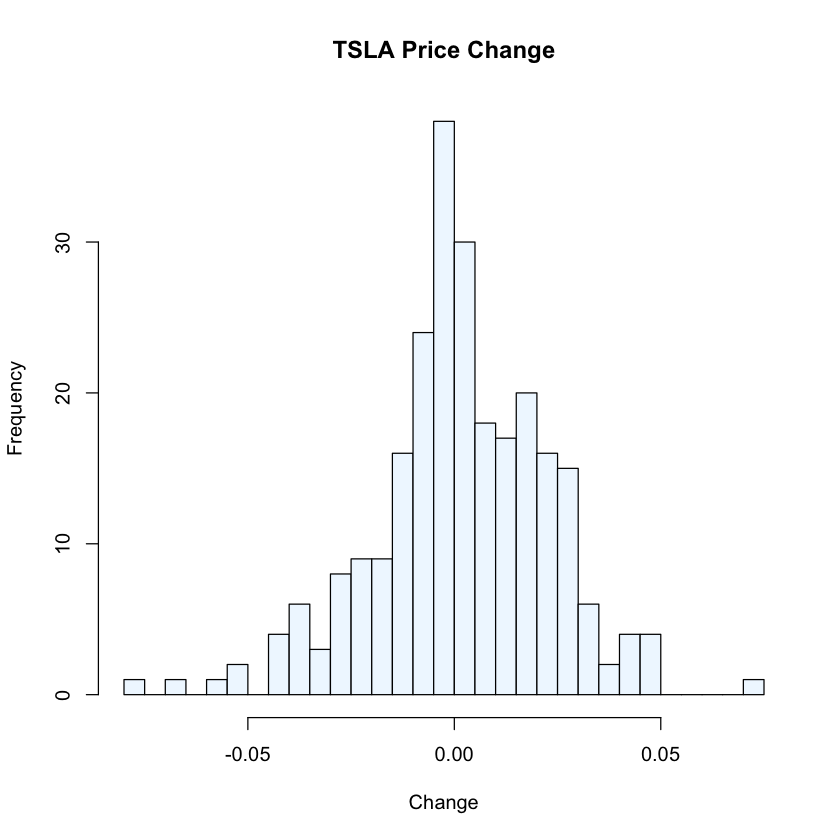

In [145]:
# 11. Show histgram with builtin graphing tools
hist(tsla_change[,1], breaks=25, xlab="Change", main="TSLA Price Change", col='aliceblue')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

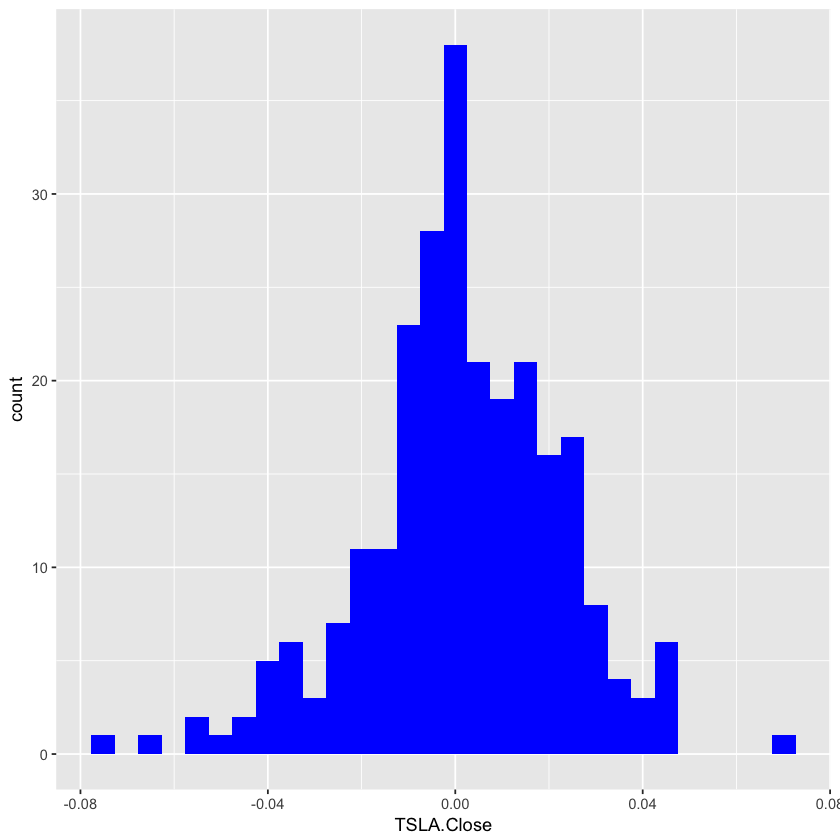

In [146]:
# 12. Use ggplot2 library to create plots
# not quite as intuitive, but give nicer plot by default
# start with ggplot function and typically the data, although you can have other parameters
# then you add layers to your plot
library(ggplot2)
ggplot(data=tsla_change) + geom_histogram(aes(x=TSLA.Close), fill='blue')

# am going to stick with the defaults, but you can see ggplot is giving us some helpful advice

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

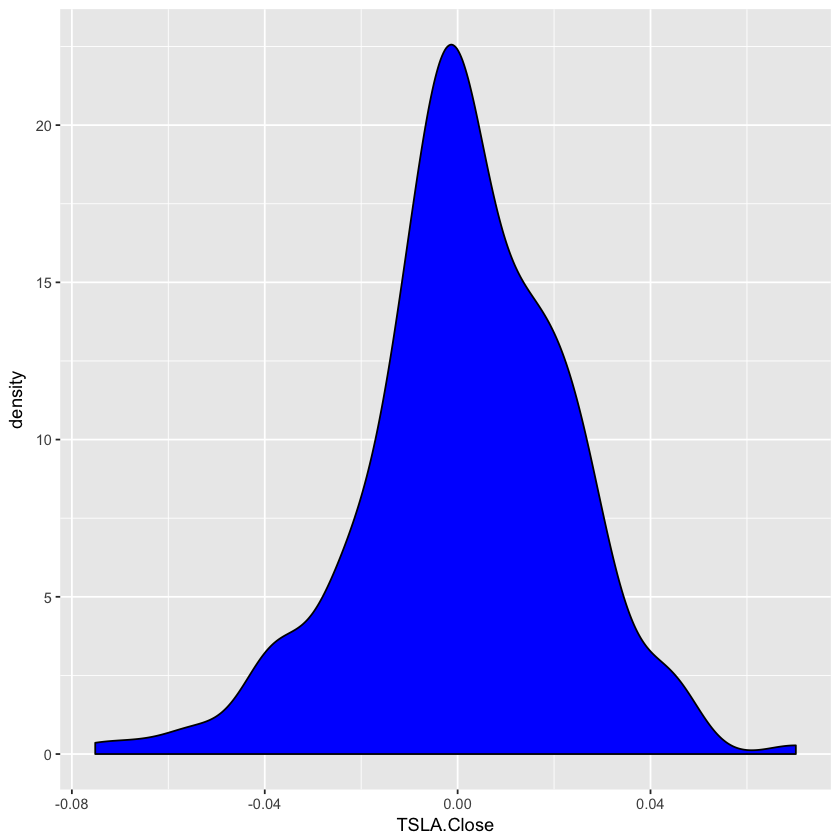

In [149]:
# 13. Density plot gives a slightly different smoothed representation of the data
ggplot(data=tsla_change) + geom_density(aes(x=TSLA.Close), fill='blue')